In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [216]:
data_train=pd.read_csv("train_loan.csv",index_col=0)

In [217]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [218]:
data_train.shape

(614, 12)

In [219]:
data_test=pd.read_csv("test_loan.csv",index_col=0)

In [220]:
data_test.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban


In [221]:
data_test.shape

(367, 11)

In [222]:
data=pd.concat([data_train,data_test])

In [223]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,,
LP001002,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,Y,No,Urban,No
LP001003,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,N,Yes,Rural,No
LP001005,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Y,Yes,Urban,Yes
LP001006,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Y,Yes,Urban,No
LP001008,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,Y,No,Urban,No


In [224]:
data.shape

(981, 12)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [226]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [227]:
data.columns.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'Dependents',
 'Education',
 'Gender',
 'LoanAmount',
 'Loan_Amount_Term',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed']

In [228]:
data["Loan_Status"].value_counts()/data.shape[0]

Y    0.430173
N    0.195719
Name: Loan_Status, dtype: float64

In [229]:
target=data["Loan_Status"]

In [230]:
data.drop("Loan_Status",axis=1,inplace=True)

In [231]:
num_data=data.select_dtypes(include=["float64","int64"])
cat_data=data.select_dtypes(include=["object"])

In [232]:
num_data.shape

(981, 5)

In [233]:
cat_data.shape

(981, 6)

In [234]:
cat_data.head()

,Dependents,Education,Gender,Married,Property_Area,Self_Employed
Loan_ID,,,,,,
LP001002,0,Graduate,Male,No,Urban,No
LP001003,1,Graduate,Male,Yes,Rural,No
LP001005,0,Graduate,Male,Yes,Urban,Yes
LP001006,0,Not Graduate,Male,Yes,Urban,No
LP001008,0,Graduate,Male,No,Urban,No


In [235]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Loan_ID,,,,,
LP001002,5849,0.0,1.0,NaN,360.0
LP001003,4583,1508.0,1.0,128.0,360.0
LP001005,3000,0.0,1.0,66.0,360.0
LP001006,2583,2358.0,1.0,120.0,360.0
LP001008,6000,0.0,1.0,141.0,360.0


In [236]:
cat_data.isnull().sum()

Dependents       25
Education         0
Gender           24
Married           3
Property_Area     0
Self_Employed    55
dtype: int64

In [237]:
cat_data.apply(lambda x:len(x.unique()))

Dependents       5
Education        2
Gender           3
Married          3
Property_Area    3
Self_Employed    3
dtype: int64

In [238]:
cat_data.columns.tolist()[0]

'Dependents'

In [239]:
for i in [0,1,2,3,4,5]:
    print(cat_data.columns.tolist()[i])
    print(" ")
    print(cat_data.iloc[:,i].value_counts())
    print("missing values:",cat_data.iloc[:,i].isnull().sum())
    print("\n")

Dependents
 
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64
missing values: 25


Education
 
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
missing values: 0


Gender
 
Male      775
Female    182
Name: Gender, dtype: int64
missing values: 24


Married
 
Yes    631
No     347
Name: Married, dtype: int64
missing values: 3


Property_Area
 
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
missing values: 0


Self_Employed
 
No     807
Yes    119
Name: Self_Employed, dtype: int64
missing values: 55




In [240]:
for i in [0,1,2,3,4,5]:
    cat_data.iloc[:,i].fillna(cat_data.iloc[:,i].dropna().mode().values[0],inplace=True)

In [241]:
cat_data.isnull().sum()

Dependents       0
Education        0
Gender           0
Married          0
Property_Area    0
Self_Employed    0
dtype: int64

In [242]:
for i in [0,1,2,3,4,5]:
    print(cat_data.columns.tolist()[i])
    print(" ")
    print(cat_data.iloc[:,i].value_counts())
    print("missing values:",cat_data.iloc[:,i].isnull().sum())
    print("\n")

Dependents
 
0     570
2     160
1     160
3+     91
Name: Dependents, dtype: int64
missing values: 0


Education
 
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
missing values: 0


Gender
 
Male      799
Female    182
Name: Gender, dtype: int64
missing values: 0


Married
 
Yes    634
No     347
Name: Married, dtype: int64
missing values: 0


Property_Area
 
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64
missing values: 0


Self_Employed
 
No     862
Yes    119
Name: Self_Employed, dtype: int64
missing values: 0




In [243]:
cat_data["Dependents"]=cat_data["Dependents"].str.rstrip("+").astype(np.int)

In [244]:
cat_data["Education"]=cat_data["Education"].map({"Graduate":1,"Not Graduate":0})

In [245]:
cat_data["Gender"]=cat_data["Gender"].map({"Male":1,"Female":0})

In [246]:
cat_data["Married"]=cat_data["Married"].map({"Yes":1,"No":0})

In [247]:
cat_data["Self_Employed"]=cat_data["Self_Employed"].map({"Yes":1,"No":0})

In [248]:
cat_data["Dependents"]=cat_data["Dependents"].map({0:"single",1:"nuclear",2:"small",3:"large"})

In [249]:
for i in [0,1,2,3,4,5]:
    print(cat_data.columns.tolist()[i])
    print(" ")
    print(cat_data.iloc[:,i].value_counts())
    print("\n")

Dependents
 
single     570
small      160
nuclear    160
large       91
Name: Dependents, dtype: int64


Education
 
1    763
0    218
Name: Education, dtype: int64


Gender
 
1    799
0    182
Name: Gender, dtype: int64


Married
 
1    634
0    347
Name: Married, dtype: int64


Property_Area
 
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64


Self_Employed
 
0    862
1    119
Name: Self_Employed, dtype: int64




In [250]:
num_data.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History       79
LoanAmount           27
Loan_Amount_Term     20
dtype: int64

In [251]:
num_data["total_income"]=num_data["ApplicantIncome"]+num_data["CoapplicantIncome"]

In [252]:
num_data.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

In [253]:
num_data["Credit_History"]=num_data["Credit_History"].map({1.0:"Yes",0.0:"No",np.nan:"Unknown"})

In [254]:
num_data["Credit_History"].fillna("Unknown",inplace=True)

In [255]:
num_data.dtypes

Credit_History       object
LoanAmount          float64
Loan_Amount_Term    float64
total_income        float64
dtype: object

In [256]:
#using multiple groupby to replace loan amount and loan amount term

In [257]:
combo=pd.concat([cat_data,num_data],axis=1)

In [258]:
combo.head()

,Dependents,Education,Gender,Married,Property_Area,Self_Employed,Credit_History,LoanAmount,Loan_Amount_Term,total_income
Loan_ID,,,,,,,,,,
LP001002,single,1,1,0,Urban,0,Yes,NaN,360.0,5849.0
LP001003,nuclear,1,1,1,Rural,0,Yes,128.0,360.0,6091.0
LP001005,single,1,1,1,Urban,1,Yes,66.0,360.0,3000.0
LP001006,single,0,1,1,Urban,0,Yes,120.0,360.0,4941.0
LP001008,single,1,1,0,Urban,0,Yes,141.0,360.0,6000.0


In [259]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 10 columns):
Dependents          981 non-null object
Education           981 non-null int64
Gender              981 non-null int64
Married             981 non-null int64
Property_Area       981 non-null object
Self_Employed       981 non-null int64
Credit_History      981 non-null object
LoanAmount          954 non-null float64
Loan_Amount_Term    961 non-null float64
total_income        981 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 84.3+ KB


In [260]:
for i in[1,2,3,5]:
    combo.iloc[:,i]=combo.iloc[:,i].astype("object")

In [261]:
combo.isnull().sum()

Dependents           0
Education            0
Gender               0
Married              0
Property_Area        0
Self_Employed        0
Credit_History       0
LoanAmount          27
Loan_Amount_Term    20
total_income         0
dtype: int64

In [262]:
combo.shape

(981, 10)

In [263]:
combo.columns.tolist()

['Dependents',
 'Education',
 'Gender',
 'Married',
 'Property_Area',
 'Self_Employed',
 'Credit_History',
 'LoanAmount',
 'Loan_Amount_Term',
 'total_income']

In [264]:
combo2=pd.concat([combo,target],axis=1)
combo2.head()

,Dependents,Education,Gender,Married,Property_Area,Self_Employed,Credit_History,LoanAmount,Loan_Amount_Term,total_income,Loan_Status
Loan_ID,,,,,,,,,,,
LP001002,single,1,1,0,Urban,0,Yes,NaN,360.0,5849.0,Y
LP001003,nuclear,1,1,1,Rural,0,Yes,128.0,360.0,6091.0,N
LP001005,single,1,1,1,Urban,1,Yes,66.0,360.0,3000.0,Y
LP001006,single,0,1,1,Urban,0,Yes,120.0,360.0,4941.0,Y
LP001008,single,1,1,0,Urban,0,Yes,141.0,360.0,6000.0,Y


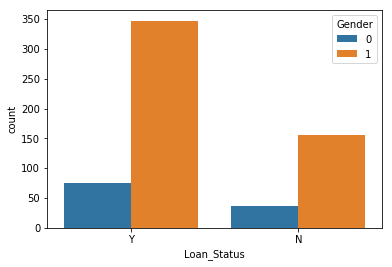

In [265]:
sns.countplot(x="Loan_Status",hue="Gender",data=combo2)

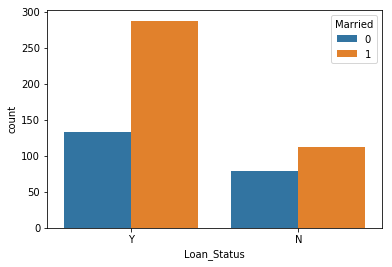

In [266]:
sns.countplot(x="Loan_Status",hue="Married",data=combo2)

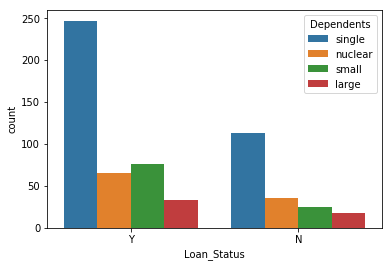

In [267]:
sns.countplot(x="Loan_Status",hue="Dependents",data=combo2)

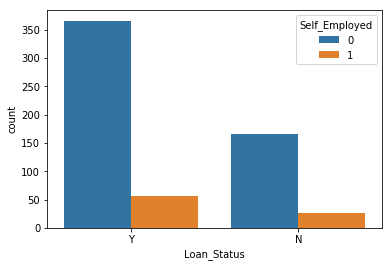

In [268]:
sns.countplot(x="Loan_Status",hue="Self_Employed",data=combo2)

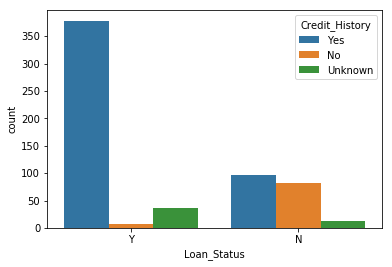

In [269]:
sns.countplot(x="Loan_Status",hue="Credit_History",data=combo2)

In [270]:
corr=combo2.corr()

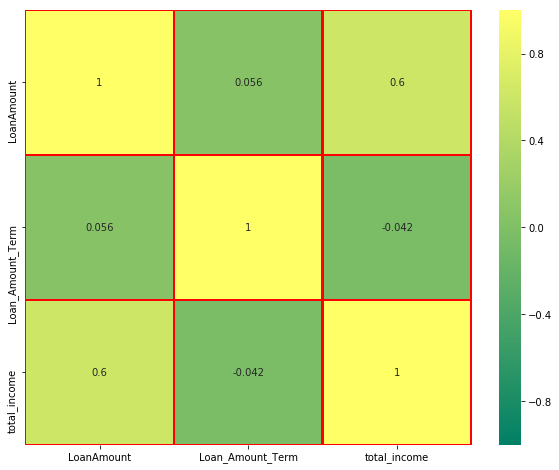

In [271]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,vmin=-1.0,vmax=1.0,cmap="summer",annot=True,linecolor="red",linewidths=1.5)

LoanAmount             AxesSubplot(0.125,0.125;0.227941x0.755)
Loan_Amount_Term    AxesSubplot(0.398529,0.125;0.227941x0.755)
total_income        AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

<Figure size 720x576 with 0 Axes>

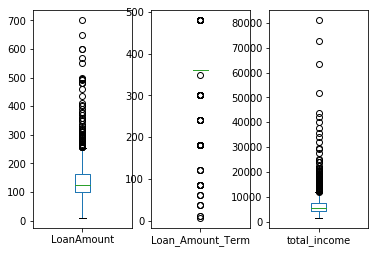

In [273]:
plt.figure(figsize=(10,8))
num_data.iloc[:,1:].plot(kind="box",subplots=True,layout=(1,3),sharex=False,sharey=False)

In [61]:
#use only categorical columns to group by and numeric column to work upon

In [274]:
combo.Loan_Amount_Term = combo.groupby(['Gender', 'Dependents','Education','Credit_History','Married','Property_Area', 'Self_Employed']).Loan_Amount_Term.transform(lambda x: x.fillna(x.mean()))


In [275]:
combo.LoanAmount = combo.groupby(['Gender', 'Dependents','Education','Credit_History','Married','Property_Area', 'Self_Employed']).LoanAmount.transform(lambda x: x.fillna(x.mean()))


In [276]:
combo.isnull().sum()

Dependents          0
Education           0
Gender              0
Married             0
Property_Area       0
Self_Employed       0
Credit_History      0
LoanAmount          4
Loan_Amount_Term    1
total_income        0
dtype: int64

In [277]:
combo["LoanAmount"]=combo["LoanAmount"].fillna(combo["LoanAmount"].median())

In [278]:
combo["Loan_Amount_Term"].fillna(combo["Loan_Amount_Term"].median(),inplace=True)

In [279]:
combo.isnull().sum()

Dependents          0
Education           0
Gender              0
Married             0
Property_Area       0
Self_Employed       0
Credit_History      0
LoanAmount          0
Loan_Amount_Term    0
total_income        0
dtype: int64

LoanAmount             AxesSubplot(0.125,0.125;0.227941x0.755)
Loan_Amount_Term    AxesSubplot(0.398529,0.125;0.227941x0.755)
total_income        AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

<Figure size 1080x576 with 0 Axes>

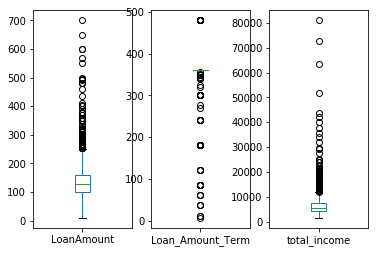

In [280]:
plt.figure(figsize=(15,8))
combo[["LoanAmount","Loan_Amount_Term","total_income"]].plot(kind="box",subplots=True,layout=(1,3),sharex=False,sharey=False)

In [281]:
for col in ["LoanAmount","Loan_Amount_Term","total_income"]:
        percentiles = combo[col].quantile([0.05,0.95]).values
        combo[col][combo[col] <= percentiles[0]] = percentiles[0]
        combo[col][combo[col] >= percentiles[1]] = percentiles[1]

LoanAmount             AxesSubplot(0.125,0.125;0.227941x0.755)
Loan_Amount_Term    AxesSubplot(0.398529,0.125;0.227941x0.755)
total_income        AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

<Figure size 1080x576 with 0 Axes>

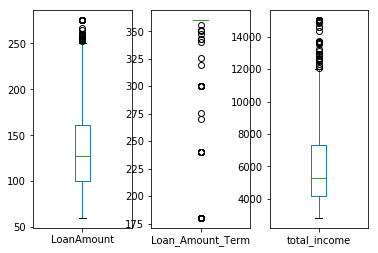

In [282]:
plt.figure(figsize=(15,8))
combo[["LoanAmount","Loan_Amount_Term","total_income"]].plot(kind="box",subplots=True,layout=(1,3),sharex=False,sharey=False)

In [68]:
#clean data now time for categorical preprocessing but before that

In [283]:
combo["debt_income_ratio"]=combo["total_income"]/combo["LoanAmount"]

In [284]:
combo["Loan_Amount_Term"].describe(include="all")

count    981.000000
mean     341.612067
std       52.146064
min      180.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      360.000000
Name: Loan_Amount_Term, dtype: float64

In [285]:
combo["Loan_Amount_Term"]=pd.cut(combo["Loan_Amount_Term"],bins=[6,90,180,300,480],labels=["insta","short","medium","long"],include_lowest=True)

In [286]:
combo["Loan_Amount_Term"]=combo["Loan_Amount_Term"].astype(object)

In [287]:
combo.head(10)

,Dependents,Education,Gender,Married,Property_Area,Self_Employed,Credit_History,LoanAmount,Loan_Amount_Term,total_income,debt_income_ratio
Loan_ID,,,,,,,,,,,
LP001002,single,1,1,0,Urban,0,Yes,115.906977,long,5849.0,50.462881
LP001003,nuclear,1,1,1,Rural,0,Yes,128.000000,long,6091.0,47.585938
LP001005,single,1,1,1,Urban,1,Yes,66.000000,long,3000.0,45.454545
LP001006,single,0,1,1,Urban,0,Yes,120.000000,long,4941.0,41.175000
LP001008,single,1,1,0,Urban,0,Yes,141.000000,long,6000.0,42.553191
LP001011,small,1,1,1,Urban,1,Yes,267.000000,long,9613.0,36.003745
LP001013,single,0,1,1,Urban,0,Yes,95.000000,long,3849.0,40.515789
LP001014,large,1,1,1,Semiurban,0,No,158.000000,long,5540.0,35.063291
LP001018,small,1,1,1,Urban,0,Yes,168.000000,long,5532.0,32.928571


In [288]:
combo.shape

(981, 11)

In [289]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 11 columns):
Dependents           981 non-null object
Education            981 non-null object
Gender               981 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
Credit_History       981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null object
total_income         981 non-null float64
debt_income_ratio    981 non-null float64
dtypes: float64(3), object(8)
memory usage: 132.0+ KB


In [290]:
cols=[cols for cols in combo.columns.tolist() if combo[cols].dtypes=="object"]

In [291]:
cols

['Dependents',
 'Education',
 'Gender',
 'Married',
 'Property_Area',
 'Self_Employed',
 'Credit_History',
 'Loan_Amount_Term']

In [292]:
for i in cols:
    print(i)

Dependents
Education
Gender
Married
Property_Area
Self_Employed
Credit_History
Loan_Amount_Term


In [293]:
for i in cols:
    df1=pd.DataFrame()
    df_1=pd.get_dummies(combo[i],prefix=i)
    combo=pd.concat([combo,df_1],axis=1)
    combo.drop(i,axis=1,inplace=True)
    

In [294]:
combo.shape

(981, 24)

In [295]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [296]:
combo.head()

,LoanAmount,total_income,debt_income_ratio,Dependents_large,Dependents_nuclear,Dependents_single,Dependents_small,Education_0,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_0,Self_Employed_1,Credit_History_No,Credit_History_Unknown,Credit_History_Yes,Loan_Amount_Term_long,Loan_Amount_Term_medium,Loan_Amount_Term_short
Loan_ID,,,,,,,,,,,,,,,,,,,,,,,,
LP001002,115.906977,5849.0,50.462881,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0
LP001003,128.000000,6091.0,47.585938,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0
LP001005,66.000000,3000.0,45.454545,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
LP001006,120.000000,4941.0,41.175000,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0
LP001008,141.000000,6000.0,42.553191,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0


In [297]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 24 columns):
LoanAmount                 981 non-null float64
total_income               981 non-null float64
debt_income_ratio          981 non-null float64
Dependents_large           981 non-null uint8
Dependents_nuclear         981 non-null uint8
Dependents_single          981 non-null uint8
Dependents_small           981 non-null uint8
Education_0                981 non-null uint8
Education_1                981 non-null uint8
Gender_0                   981 non-null uint8
Gender_1                   981 non-null uint8
Married_0                  981 non-null uint8
Married_1                  981 non-null uint8
Property_Area_Rural        981 non-null uint8
Property_Area_Semiurban    981 non-null uint8
Property_Area_Urban        981 non-null uint8
Self_Employed_0            981 non-null uint8
Self_Employed_1            981 non-null uint8
Credit_History_No          981 non-null uint8
Credit_H

In [298]:
#now data is ready to be splitted after re combing with the target column

In [299]:
final=pd.concat([combo,target],axis=1)

In [300]:
final.shape

(981, 25)

In [301]:
final.tail()

,LoanAmount,total_income,debt_income_ratio,Dependents_large,Dependents_nuclear,Dependents_single,Dependents_small,Education_0,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_0,Self_Employed_1,Credit_History_No,Credit_History_Unknown,Credit_History_Yes,Loan_Amount_Term_long,Loan_Amount_Term_medium,Loan_Amount_Term_short,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,,,,,
LP002971,113.0,5786.0,51.203540,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,NaN
LP002975,115.0,4867.0,42.321739,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,NaN
LP002980,126.0,5243.0,41.611111,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,NaN
LP002986,158.0,7393.0,46.791139,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,NaN
LP002989,98.0,9200.0,93.877551,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,NaN


In [302]:
final["Loan_Status"]=final["Loan_Status"].map({"Y":1,"N":0})

In [303]:
final.head()

,LoanAmount,total_income,debt_income_ratio,Dependents_large,Dependents_nuclear,Dependents_single,Dependents_small,Education_0,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_0,Self_Employed_1,Credit_History_No,Credit_History_Unknown,Credit_History_Yes,Loan_Amount_Term_long,Loan_Amount_Term_medium,Loan_Amount_Term_short,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,,,,,
LP001002,115.906977,5849.0,50.462881,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1.0
LP001003,128.000000,6091.0,47.585938,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0.0
LP001005,66.000000,3000.0,45.454545,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1.0
LP001006,120.000000,4941.0,41.175000,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1.0
LP001008,141.000000,6000.0,42.553191,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1.0


In [304]:
final.iloc[613,:]

LoanAmount                  133.000000
total_income               4583.000000
debt_income_ratio            34.458647
Dependents_large              0.000000
Dependents_nuclear            0.000000
Dependents_single             1.000000
Dependents_small              0.000000
Education_0                   0.000000
Education_1                   1.000000
Gender_0                      1.000000
Gender_1                      0.000000
Married_0                     1.000000
Married_1                     0.000000
Property_Area_Rural           0.000000
Property_Area_Semiurban       1.000000
Property_Area_Urban           0.000000
Self_Employed_0               0.000000
Self_Employed_1               1.000000
Credit_History_No             1.000000
Credit_History_Unknown        0.000000
Credit_History_Yes            0.000000
Loan_Amount_Term_long         1.000000
Loan_Amount_Term_medium       0.000000
Loan_Amount_Term_short        0.000000
Loan_Status                   0.000000
Name: LP002990, dtype: fl

In [305]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 25 columns):
LoanAmount                 981 non-null float64
total_income               981 non-null float64
debt_income_ratio          981 non-null float64
Dependents_large           981 non-null uint8
Dependents_nuclear         981 non-null uint8
Dependents_single          981 non-null uint8
Dependents_small           981 non-null uint8
Education_0                981 non-null uint8
Education_1                981 non-null uint8
Gender_0                   981 non-null uint8
Gender_1                   981 non-null uint8
Married_0                  981 non-null uint8
Married_1                  981 non-null uint8
Property_Area_Rural        981 non-null uint8
Property_Area_Semiurban    981 non-null uint8
Property_Area_Urban        981 non-null uint8
Self_Employed_0            981 non-null uint8
Self_Employed_1            981 non-null uint8
Credit_History_No          981 non-null uint8
Credit_H

In [306]:
train=final.iloc[:614,:]

In [307]:
train.tail()

,LoanAmount,total_income,debt_income_ratio,Dependents_large,Dependents_nuclear,Dependents_single,Dependents_small,Education_0,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_0,Self_Employed_1,Credit_History_No,Credit_History_Unknown,Credit_History_Yes,Loan_Amount_Term_long,Loan_Amount_Term_medium,Loan_Amount_Term_short,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,,,,,
LP002978,71.0,2900.0,40.845070,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1.0
LP002979,60.0,4106.0,68.433333,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,1,1.0
LP002983,253.0,8312.0,32.853755,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1.0
LP002984,187.0,7583.0,40.550802,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1.0
LP002990,133.0,4583.0,34.458647,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0.0


In [308]:
train["Loan_Status"]=train["Loan_Status"].apply(np.int64)

In [309]:
test=final.iloc[614:,:]

In [310]:
test.shape

(367, 25)

In [311]:
test.head()

,LoanAmount,total_income,debt_income_ratio,Dependents_large,Dependents_nuclear,Dependents_single,Dependents_small,Education_0,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_0,Self_Employed_1,Credit_History_No,Credit_History_Unknown,Credit_History_Yes,Loan_Amount_Term_long,Loan_Amount_Term_medium,Loan_Amount_Term_short,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,,,,,
LP001015,110.0,5720.0,52.000000,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,NaN
LP001022,126.0,4576.0,36.317460,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,NaN
LP001031,208.0,6800.0,32.692308,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,NaN
LP001035,100.0,4886.0,48.860000,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,NaN
LP001051,78.0,3276.0,42.000000,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,NaN


In [312]:
train.shape

(614, 25)

In [313]:
train.head()

,LoanAmount,total_income,debt_income_ratio,Dependents_large,Dependents_nuclear,Dependents_single,Dependents_small,Education_0,Education_1,Gender_0,Gender_1,Married_0,Married_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_0,Self_Employed_1,Credit_History_No,Credit_History_Unknown,Credit_History_Yes,Loan_Amount_Term_long,Loan_Amount_Term_medium,Loan_Amount_Term_short,Loan_Status
Loan_ID,,,,,,,,,,,,,,,,,,,,,,,,,
LP001002,115.906977,5849.0,50.462881,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1
LP001003,128.000000,6091.0,47.585938,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0
LP001005,66.000000,3000.0,45.454545,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1
LP001006,120.000000,4941.0,41.175000,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1
LP001008,141.000000,6000.0,42.553191,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1


In [319]:
X=train.iloc[:,:-1].values

In [320]:
Y=train.iloc[:,-1].values

In [322]:
Z=test.iloc[:,:-1].values

In [325]:
X[:1]

array([[1.15906977e+02, 5.84900000e+03, 5.04628812e+01, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [326]:
from sklearn.preprocessing import StandardScaler

In [327]:
scale=StandardScaler()

In [328]:
X_std=scale.fit_transform(X)

In [329]:
Z_std=scale.fit_transform(Z)

In [330]:
from sklearn.ensemble import RandomForestClassifier

In [333]:
random=RandomForestClassifier(n_estimators=500,max_depth=3,oob_score=True,random_state=21,n_jobs=-1,class_weight="balanced")

In [332]:
from sklearn.ensemble import GradientBoostingClassifier

In [334]:
gradient=GradientBoostingClassifier(n_estimators=500,subsample=0.8,max_depth=5,random_state=21)

In [335]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

In [336]:
#VOTING ENSEMBLE

In [337]:
from sklearn.ensemble import VotingClassifier

In [339]:
vote=VotingClassifier(estimators=[("ada",ada),("gradient",gradient),("random",random)],voting="soft",n_jobs=-1)

In [340]:
fit=vote.fit(X_std,Y)

In [341]:
fit.score(X_std,Y)

0.998371335504886

In [342]:
pred=fit.predict(Z_std)

In [343]:
submit=pd.read_csv("Sample_Submission_loan.csv")

In [344]:
submit.head()

,Loan_ID,Loan_Status


In [345]:
pred_test=pd.Series(pred).astype(int)

In [346]:
id=data_test.index

In [347]:
id=pd.Series(id)

In [348]:
submit["Loan_ID"]=id

In [349]:
submit["Loan_Status"]=pred_test

In [352]:
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [351]:
submit["Loan_Status"]=submit["Loan_Status"].map({0:"N",1:"Y"})

In [354]:
submit.to_csv("loan_final2.csv",index=False)

In [355]:
submit["Loan_Status"].value_counts()

Y    269
N     98
Name: Loan_Status, dtype: int64